# DM2 - Scoring Prediction 

In [1]:
#Importing Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#SMOTE to balance the Imbalance Data
from imblearn.over_sampling import SMOTE

#for Spliting Data and Hyperparameter Tuning 
from sklearn.model_selection import train_test_split, GridSearchCV

#Importing Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from catboost import CatBoostClassifier
    
#Bagging Algo
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.neural_network import MLPClassifier

#To tranform data
from sklearn import preprocessing

#statistical Tools
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

#Setting Format
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('C:/Users/Fabien/Documents/table_training.csv', sep = ";")


Distribution de la variable cible : 


<AxesSubplot:>

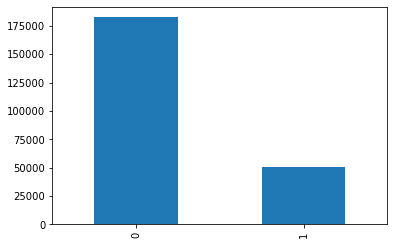

In [3]:
train.loan_default.value_counts().plot(kind='bar')

On remarque que notre variable cible est très déséquilibrée, avant de réussir le projet nous avons échoués plusieurs fois à obtenir des résultats satisfaisants à cause de ce déséquilibre, nous allons donc utiliser la méthode SMOTE dans la suite de nos prédictions pour pallier à ce déséquilibre. 

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,233153.00000,535918.06701,68315.42439,417428.00000,476787.00000,535979.00000,595040.00000,671084.00000
disbursed_amount,233153.00000,54357.00974,12971.33963,13320.00000,47145.00000,53803.00000,60413.00000,990572.00000
asset_cost,233153.00000,75865.14305,18944.78739,37000.00000,65717.00000,70946.00000,79202.00000,1628992.00000
branch_id,233153.00000,72.93612,69.83514,1.00000,14.00000,61.00000,130.00000,261.00000
supplier_id,233153.00000,19638.62145,3491.95089,10524.00000,16535.00000,20333.00000,23000.00000,24803.00000
manufacturer_id,233153.00000,69.02816,22.14130,45.00000,48.00000,86.00000,86.00000,156.00000
Current_pincode_ID,233153.00000,3396.88864,2238.14864,1.00000,1511.00000,2970.00000,5677.00000,7345.00000
State_ID,233153.00000,7.26225,4.48224,1.00000,4.00000,6.00000,10.00000,22.00000
Employee_code_ID,233153.00000,1549.47522,975.26293,1.00000,713.00000,1451.00000,2362.00000,3795.00000
Aadhar_flag,233153.00000,0.84032,0.36631,0.00000,1.00000,1.00000,1.00000,1.00000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233153 entries, 0 to 233152
Data columns (total 38 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   UniqueID                          233153 non-null  int64 
 1   disbursed_amount                  233153 non-null  int64 
 2   asset_cost                        233153 non-null  int64 
 3   ltv                               233153 non-null  object
 4   branch_id                         233153 non-null  int64 
 5   supplier_id                       233153 non-null  int64 
 6   manufacturer_id                   233153 non-null  int64 
 7   Current_pincode_ID                233153 non-null  int64 
 8   Employment_Type_K                 225492 non-null  object
 9   State_ID                          233153 non-null  int64 
 10  Employee_code_ID                  233153 non-null  int64 
 11  Aadhar_flag                       233153 non-null  int64 
 12  PA

On remarque ici que 'ltv' est codé en object, nous allons le convertir en float directemment pour éviter d'avoir des erreurs. 

In [6]:
#traitement de ltv, considéré comme string alors que c'est un float 
train['ltv'] = train['ltv'].str.replace(',','.').astype('float64')

# Exploration des données

In [7]:
print(f"Dimension du dataset est {train.shape}\n")

Dimension du dataset est (233153, 38)



In [8]:
#Lets Look at few columns

#Pour l'exploration de données, il est préférable de les séparer dans des variables différentes, plus simple d'accès par la suite 

numerical=['disbursed_amount','asset_cost','PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT','ltv','DELINQUENT_ACCTS_IN_LAST_SIX_THS','NEW_ACCTS_IN_LAST_SIX_THS']
categorical=[ 'PERFORM_CNS_SCORE_DESCRIPTION','AVERAGE_ACCT_AGE_bis','CREDIT_HISTORY_LENGTH_bis','Employment_Type_K']

idvar  = ['UniqueID','supplier_id','branch_id','manufacturer_id','Current_pincode_ID','State_ID','Employee_code_ID','NO_OF_INQUIRIES','VoterID_flag', 'Driving_flag', 'Passport_flag','Aadhar_flag', 'PAN_flag']
target = ['loan_default']

In [9]:
train[idvar].head()

,UniqueID,supplier_id,branch_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,NO_OF_INQUIRIES,VoterID_flag,Driving_flag,Passport_flag,Aadhar_flag,PAN_flag
0,537409,22807,67,45,1502,6,1998,0,0,0,0,1,0
1,417566,22807,67,45,1497,6,1998,0,0,0,0,1,0
2,624493,22807,67,45,1501,6,1998,1,0,0,0,1,0
3,539055,22807,67,45,1495,6,1998,1,0,0,0,1,0
4,518279,22807,67,45,1501,6,1998,0,0,0,0,1,0


In [10]:
# On supprime toutes les variables id car elles ne sont pas utiles à la prédiction. 

train=train.drop(idvar,axis=1)
train=train.drop(['PERFORM_CNS_SCORE'],axis=1)

In [11]:
train.head()

,disbursed_amount,asset_cost,ltv,Employment_Type_K,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_THS,DELINQUENT_ACCTS_IN_LAST_SIX_THS,AVERAGE_ACCT_AGE_bis,CREDIT_HISTORY_LENGTH_bis,loan_default
0,47145,65550,73.23000,Self employed,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,2,2,1
1,53278,61360,89.63000,Self employed,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,57513,66113,88.48000,Self employed,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,1
3,52378,60300,88.39000,Self employed,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,54513,61900,89.66000,Self employed,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,2,2,0


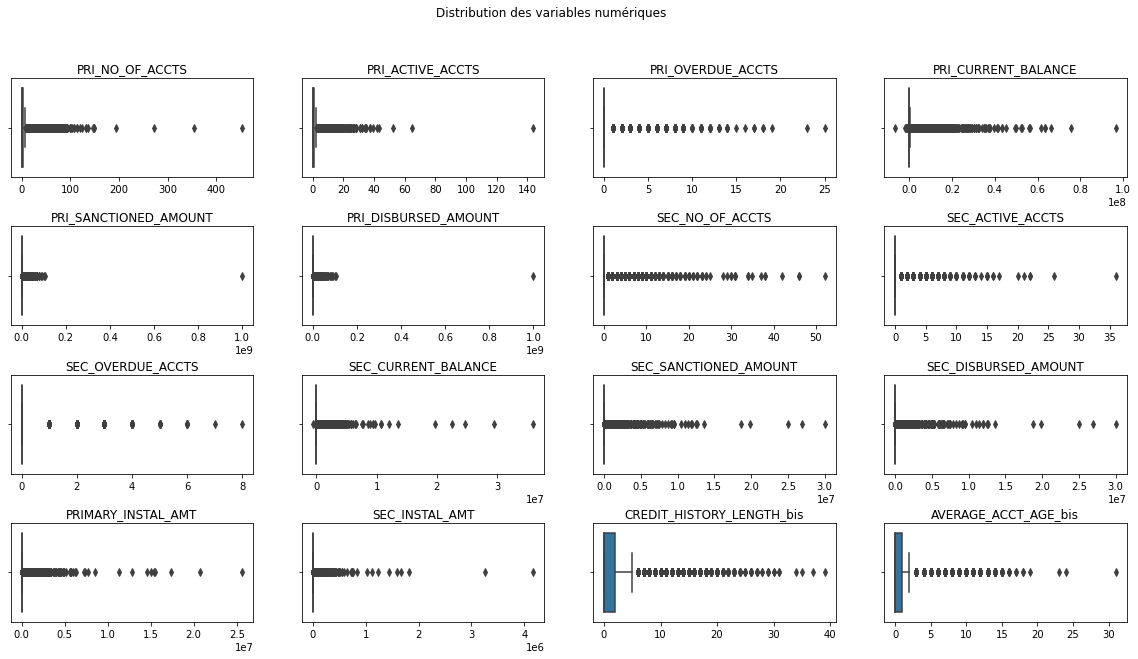

In [12]:
n=['PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT',
       'CREDIT_HISTORY_LENGTH_bis', 'AVERAGE_ACCT_AGE_bis','asset_cost','ltv']
data=train[n]
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution des variables numériques')

for ax, feature, name in zip(axes.flatten(), data.values.T, data.columns):
    sns.boxplot(feature, ax=ax)
    ax.set(title=str(name))
plt.show()

On remarque que les variables numériques sont surtout composées de 0. Cela s'explique par le fait que notre dataframe est surtout composé de nouveaux clients qui n'ont jamais fait de prêts auparavant. 

Il est difficile de tirer des conclusions sur ces graphiques, nous pouvons néanmoins regrouper les informations des variables préfixés par 'PRI' et 'SEC' car elles concernent les informations de l'emprunteur et du co-emprunteur, il serait redondant de les garder séparer et nous ne pouvons pas les retirer car ce sont des informations essentielles malgré le fait qu'elles soient surtout composées de 0. 

On remarque par contre que les variables 'credit_history_length_bis' et 'average_acct_age_bis' sont un peu mieux réprésentées que les autres, nous allons les regarder plus en détails.


<AxesSubplot:xlabel='AVERAGE_ACCT_AGE_bis', ylabel='loan_default'>

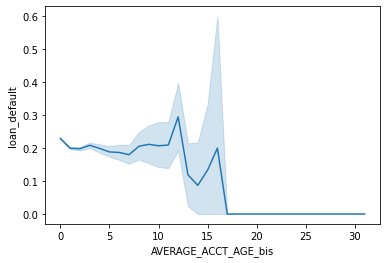

In [13]:
# On utilise lineplot de seaborn pour obtenir l'intervalle de confiance avec la variable cible afin de déceler un éventuel lien graphiquement.
sns.lineplot(x=train['AVERAGE_ACCT_AGE_bis'],y=train['loan_default'])

On remarque un pic entre 12 et 16, il semblerait qu'à partir d'un moment la chance que le paiement soit en défaut est plus important.

<AxesSubplot:xlabel='CREDIT_HISTORY_LENGTH_bis', ylabel='loan_default'>

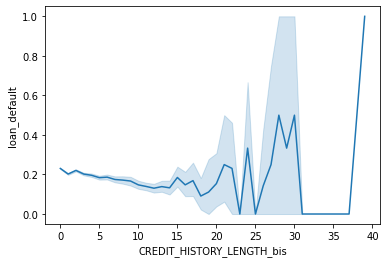

In [14]:

sns.lineplot(x=train['CREDIT_HISTORY_LENGTH_bis'],y=train['loan_default'])

On remarque ici une tendance, plus le crédit est long plus il a de chance d'être en défaut. De plus en général plus un crédit est long plus le montant emprunté est élevé. 
On remarque également un net pic après 35 ce qui laisse penser que notre dataset comporte des paiements en défaut à chaque fois que crédit_history_length vaut plus que 35, il faut les retirer.

In [15]:
# Analyse des variables catégorielles 

In [16]:
train.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

No Bureau History Available                                116949
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

<AxesSubplot:xlabel='PERFORM_CNS_SCORE_DESCRIPTION', ylabel='count'>

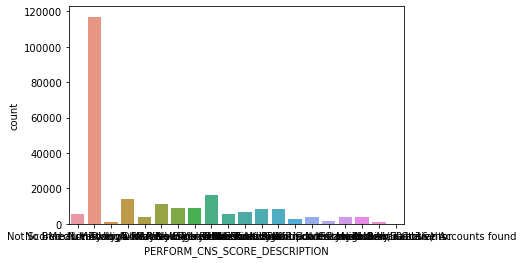

In [17]:
sns.countplot(x = train['PERFORM_CNS_SCORE_DESCRIPTION'])

Il y a trop de modalités, il faut les regrouper. 

In [18]:
train.Employment_Type_K.value_counts()

Self employed    127635
Salaried          97857
Name: Employment_Type_K, dtype: int64

# Regroupement des modalités de CNS_SCORE_Description

In [19]:
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('No Bureau History Available', 1)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('Not Scored: Sufficient History Not Available',1)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer',1)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',1)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('Not Scored: No Updates available in last 36 ths',1)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('Not Scored: Only a Guarantor', 1)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',1)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('M-Very High Risk', 6)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('L-Very High Risk', 6)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('K-High Risk', 5)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('J-High Risk', 5)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('I-Medium Risk', 4)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('H-Medium Risk', 4)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('G-Low Risk', 3)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('F-Low Risk', 3)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('E-Low Risk', 3)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('D-Very Low Risk', 2)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('C-Very Low Risk', 2)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('B-Very Low Risk', 2)
train['PERFORM_CNS_SCORE_DESCRIPTION'] = train['PERFORM_CNS_SCORE_DESCRIPTION'].replace('A-Very Low Risk', 2)


In [20]:
train.head()

,disbursed_amount,asset_cost,ltv,Employment_Type_K,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_THS,DELINQUENT_ACCTS_IN_LAST_SIX_THS,AVERAGE_ACCT_AGE_bis,CREDIT_HISTORY_LENGTH_bis,loan_default
0,47145,65550,73.23000,Self employed,4,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,2,2,1
1,53278,61360,89.63000,Self employed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,57513,66113,88.48000,Self employed,6,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,1,1,1
3,52378,60300,88.39000,Self employed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,54513,61900,89.66000,Self employed,2,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,2,2,0


<AxesSubplot:xlabel='PERFORM_CNS_SCORE_DESCRIPTION', ylabel='count'>

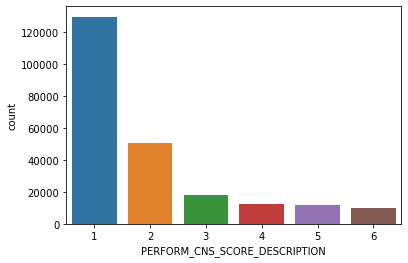

In [21]:
sns.countplot(x = train['PERFORM_CNS_SCORE_DESCRIPTION'])

On voit nettemment mieux les différentes catégories de la variable, on remarque que les personnes non scorés(1) sont majoritaires même en cumulant les autres effectifs, ce qui confirme notre première impression plus haut. 

# Traitement des valeurs manquantes

Les algorithmes prédictifs gèrent très mal les NA, il est important de les traiter à l'avance soit en les supprimant du jeu de données soit en les remplaçants.

In [22]:
train.isna().sum()

disbursed_amount                       0
asset_cost                             0
ltv                                    0
Employment_Type_K                   7661
PERFORM_CNS_SCORE_DESCRIPTION          0
PRI_NO_OF_ACCTS                        0
PRI_ACTIVE_ACCTS                       0
PRI_OVERDUE_ACCTS                      0
PRI_CURRENT_BALANCE                    0
PRI_SANCTIONED_AMOUNT                  0
PRI_DISBURSED_AMOUNT                   0
SEC_NO_OF_ACCTS                        0
SEC_ACTIVE_ACCTS                       0
SEC_OVERDUE_ACCTS                      0
SEC_CURRENT_BALANCE                    0
SEC_SANCTIONED_AMOUNT                  0
SEC_DISBURSED_AMOUNT                   0
PRIMARY_INSTAL_AMT                     0
SEC_INSTAL_AMT                         0
NEW_ACCTS_IN_LAST_SIX_THS              0
DELINQUENT_ACCTS_IN_LAST_SIX_THS       0
AVERAGE_ACCT_AGE_bis                   0
CREDIT_HISTORY_LENGTH_bis              0
loan_default                           0
dtype: int64

Nous allons créer une nouvelle catégorie pour la variable 'Employement_type', on imagine que les NA présents dans le jeu de données sont des personnes sans emplois qui n'ont pas donné leurs informations. 

In [23]:
train['Employment_Type_K'] = train['Employment_Type_K'].fillna('Unemployed')
map_recode_employment = {'Self employed':0, 'Salaried':1, 'Unemployed':2}
train['Employment_Type_K'] = train['Employment_Type_K'].apply(lambda x: map_recode_employment[x])


In [24]:
train.Employment_Type_K.value_counts()

0    127635
1     97857
2      7661
Name: Employment_Type_K, dtype: int64

<AxesSubplot:xlabel='Employment_Type_K', ylabel='count'>

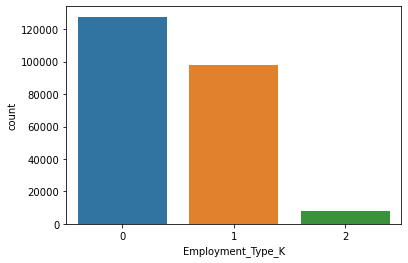

In [25]:
sns.countplot(x = train['Employment_Type_K'])

On remarque que les sans emplois sont minoritaires, c'est normal car il est beaucoup plus difficile pour une personne sans emploi d'obtenir un prêt donc il y a moins de demande.

# Regroupement des informations de l'emprunteur et du co-emprunteur

In [26]:
train.loc[:,'ACTIVE_ACCTS'] = train['PRI_ACTIVE_ACCTS'] + train['SEC_ACTIVE_ACCTS']
train.loc[:,'NO_OF_ACCTS'] = train['PRI_NO_OF_ACCTS'] + train['SEC_NO_OF_ACCTS']
train.loc[:,'OVERDUE_ACCTS'] = train['PRI_OVERDUE_ACCTS'] + train['SEC_OVERDUE_ACCTS']
train.loc[:,'CURRENT_BALANCE'] = train['PRI_CURRENT_BALANCE'] + train['SEC_CURRENT_BALANCE']
train.loc[:,'SANCTIONED_AMOUNT'] = train['PRI_SANCTIONED_AMOUNT'] + train['SEC_SANCTIONED_AMOUNT']
train.loc[:,'DISBURSED_AMOUNT'] = train['PRI_DISBURSED_AMOUNT'] + train['SEC_DISBURSED_AMOUNT']
train.loc[:,'INSTAL_AMT'] = train['PRIMARY_INSTAL_AMT'] + train['SEC_INSTAL_AMT']

# Affichage des outliers

<AxesSubplot:ylabel='ACTIVE_ACCTS'>

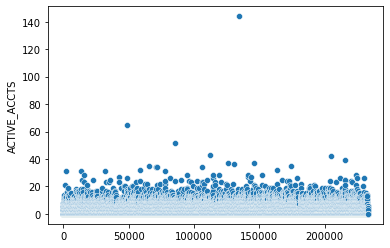

In [27]:
sns.scatterplot(data=train['ACTIVE_ACCTS'])

<AxesSubplot:>

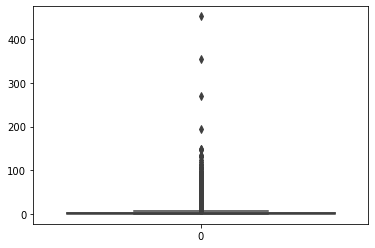

In [28]:
sns.boxplot(data=train['NO_OF_ACCTS'])

<AxesSubplot:ylabel='OVERDUE_ACCTS'>

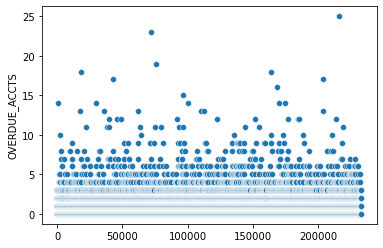

In [29]:
sns.scatterplot(data=train['OVERDUE_ACCTS'])

<AxesSubplot:ylabel='CURRENT_BALANCE'>

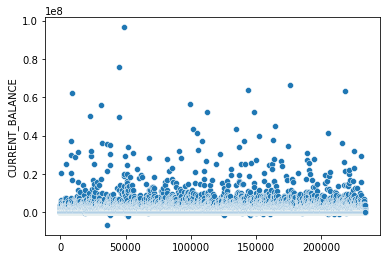

In [30]:
sns.scatterplot(data = train['CURRENT_BALANCE'])

In [31]:
# On supprime les variables regroupées
pri_sec_drop=['PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT']
train=train.drop(pri_sec_drop,axis=1)

# Traitement des valeurs extrêmes 

Les valeurs extrêmes peuvent jouer un rôle négatif dans nos prédictions, il est important de les traiter de la bonne façon. Dans un premier temps nous avons essayé d'utiliser la technique de l'IQR mais cette technique comporte un inconvénient majeur pour la suite de notre programme : elle change la distribution des variables de façon non négligable. 


In [32]:
#def outliers(df,ft):
 #   Q1 = df[ft].quantile(0.25)
  #  Q3 = df[ft].quantile(0.75)
   # IQR = Q3 - Q1 
    
   # lower = Q1 - 1.5 * IQR
    #upper = Q3 + 1.5 * IQR
    
    #ls = df.index[ (df[ft] < lower) | (df[ft] > upper)]
    #return ls

In [33]:
#index_list = []
#for feature in ['ACTIVE_ACCTS','NO_OF_ACCTS','OVERDUE_ACCTS','CURRENT_BALANCE']:
 #   index_list.extend(outliers(train,feature))
    


In [34]:
#def remove_outliers(df,ls):
 #   ls = sorted(set(ls))
  #  df = df.drop(ls)
   # return df

In [35]:
#train = remove_outliers(train,index_list)

Nous avons donc opté pour la méthode suivante : on identifie les outliers et on remplace leurs valeurs par celle qu'on retrouve le plus souvent dans la colonne.

In [36]:
def impute_outliers(data):
    ligne = list(data['ACTIVE_ACCTS'].sort_values()[-10:].index)
    #print(ligne)
    data['ACTIVE_ACCTS'][ligne] = int(data.drop(ligne)['ACTIVE_ACCTS'].mode())
    
    ligne = list(data['NO_OF_ACCTS'].sort_values()[-4:].index)
    #print(ligne)
    data['NO_OF_ACCTS'][ligne] = int(data.drop(ligne)['NO_OF_ACCTS'].mode())
    
    ligne = list(data['OVERDUE_ACCTS'].sort_values()[-20:].index)
    print(ligne)
    data['OVERDUE_ACCTS'][ligne] = int(data.drop(ligne)['OVERDUE_ACCTS'].mode())
    
    ligne = list(data['CURRENT_BALANCE'].sort_values()[-30:].index)
    #print(ligne)
    data['CURRENT_BALANCE'][ligne] = int(data.drop(ligne)['CURRENT_BALANCE'].mode())
    
    ligne = list(data['CREDIT_HISTORY_LENGTH_bis'].sort_values()[-10:].index)
    #print(ligne)
    data['CREDIT_HISTORY_LENGTH_bis'][ligne] = int(data.drop(ligne)['CREDIT_HISTORY_LENGTH_bis'].mode())
    ligne = list(data['AVERAGE_ACCT_AGE_bis'].sort_values()[-10:].index)
    #print(ligne)
    data['AVERAGE_ACCT_AGE_bis'][ligne] = int(data.drop(ligne)['AVERAGE_ACCT_AGE_bis'].mode())
    
    

In [37]:
impute_outliers(train)

[110052, 17540, 62322, 35710, 112617, 203659, 100314, 174395, 169878, 548, 29677, 96785, 168807, 42689, 203926, 18125, 163650, 75732, 72167, 215754]


In [38]:
train.head()

,disbursed_amount,asset_cost,ltv,Employment_Type_K,PERFORM_CNS_SCORE_DESCRIPTION,NEW_ACCTS_IN_LAST_SIX_THS,DELINQUENT_ACCTS_IN_LAST_SIX_THS,AVERAGE_ACCT_AGE_bis,CREDIT_HISTORY_LENGTH_bis,loan_default,ACTIVE_ACCTS,NO_OF_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,DISBURSED_AMOUNT,INSTAL_AMT
0,47145,65550,73.23000,0,4,0,1,2,2,1,1,1,1,27600,50200,50200,1991
1,53278,61360,89.63000,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,57513,66113,88.48000,0,6,0,0,1,1,1,0,3,0,0,0,0,31
3,52378,60300,88.39000,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,54513,61900,89.66000,0,2,0,0,2,2,0,0,2,0,0,0,0,1347


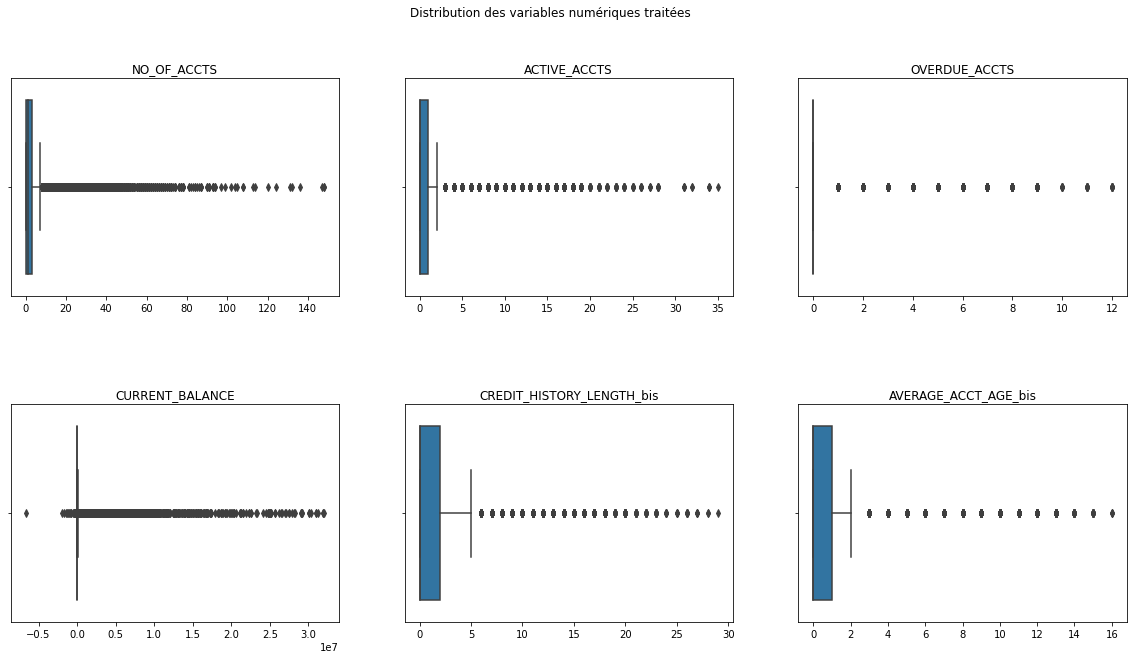

In [39]:
n = ['NO_OF_ACCTS', 'ACTIVE_ACCTS', 'OVERDUE_ACCTS', 'CURRENT_BALANCE','CREDIT_HISTORY_LENGTH_bis','AVERAGE_ACCT_AGE_bis']


data=train[n]
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution des variables numériques traitées')

for ax, feature, name in zip(axes.flatten(), data.values.T, data.columns):
    sns.boxplot(feature, ax=ax)
    ax.set(title=str(name))
plt.show()

On fait le choix ici de retirer les outliers de Credit_history_length car ils étaient uniquement labellisés avec loan_default = 1, c'est un possible biais pour nos modèles, on fait le choix de sacrifier un possible gain au niveau du score mais on évite ainsi un potentiel surapprentissage. 

# Tests statistiques 

Maintenant que nous avons traité nos données, nous pouvons passer aux tests statistiques, ces tests permettront de sélectionner les variables candidates aux modèles. 


## T test de Student

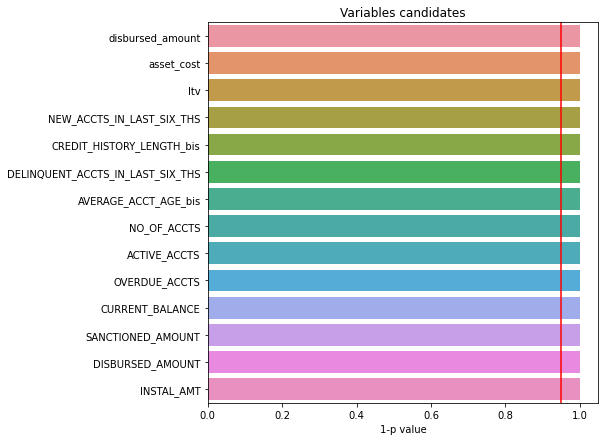

In [40]:
numerical = ['disbursed_amount', 'asset_cost', 'ltv',
            'NEW_ACCTS_IN_LAST_SIX_THS', 'CREDIT_HISTORY_LENGTH_bis',
           'DELINQUENT_ACCTS_IN_LAST_SIX_THS', 'AVERAGE_ACCT_AGE_bis',
           'NO_OF_ACCTS', 'ACTIVE_ACCTS', 'OVERDUE_ACCTS', 'CURRENT_BALANCE',
           'SANCTIONED_AMOUNT', 'DISBURSED_AMOUNT', 'INSTAL_AMT']

p=[]
from scipy.stats import ttest_ind

for i in numerical:
    df1=train.groupby('loan_default').get_group(0)
    df2=train.groupby('loan_default').get_group(1)
    t,pvalue=ttest_ind(df1[i],df2[i])
    p.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=p, y=numerical)
plt.title('Variables candidates')
plt.axvline(x=(1-0.05),color='r')
plt.xlabel('1-p value')
plt.show()

Toutes les variables ont passé le test, en effet elles vont toutes au delà de 0.95. 

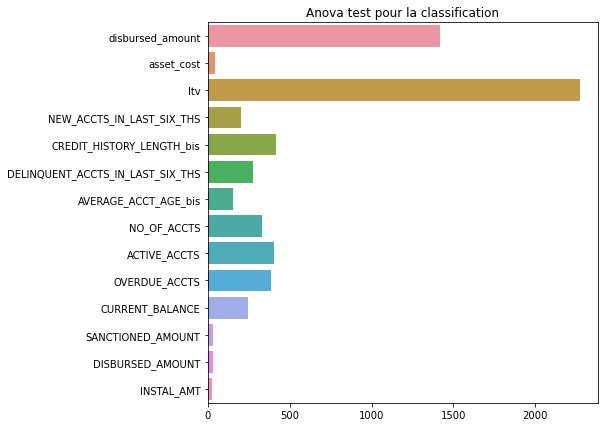

In [41]:
from sklearn.feature_selection import SelectKBest,f_classif
n = SelectKBest(score_func=f_classif, k=14)
numcols=n.fit(train[numerical],train['loan_default'])
plt.figure(figsize=(7,7))
sns.barplot(x=numcols.scores_,y=numerical)
plt.title('Anova test pour la classification')
plt.show()

le T de Student n'est pas toujours autosuffisant, il est important d'effectuer le test Anova pour prendre en compte la variance des éléments. On remarque donc que les variables n'ont pas toutes le même rôle à jouer dans le modèle, ltv et disbursed_amount semblent être les plus efficaces.

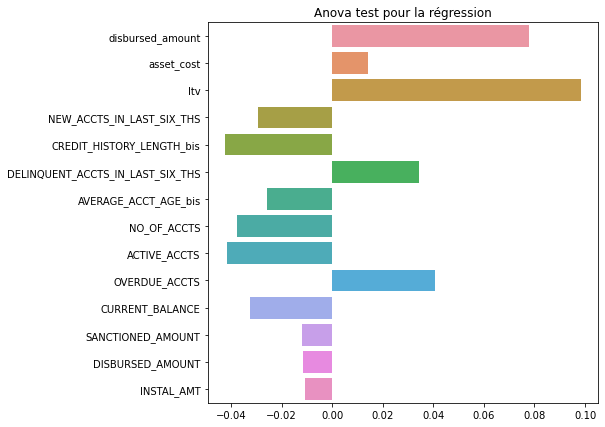

In [42]:
from sklearn.feature_selection import SelectKBest,r_regression
n = SelectKBest(score_func=r_regression, k=14)
numcols=n.fit(train[numerical],train['loan_default'])
plt.figure(figsize=(7,7))
sns.barplot(x=numcols.scores_,y=numerical)
plt.title('Anova test pour la régression')
plt.show()

Le test anova peut être exécuté en utilisant le paramètre score_func = r_regression, de cette façon nous optimisons le test pour les régressions, nous pouvons ainsi voir les variables jouant positivement et négativement sur la variable cible. On remarque que la variable la plus intéressante positive est 'ltv' et la variable négative est 'NO_OF_ACCTS'.

# Test du KHI 2 pour les variables catégorielles

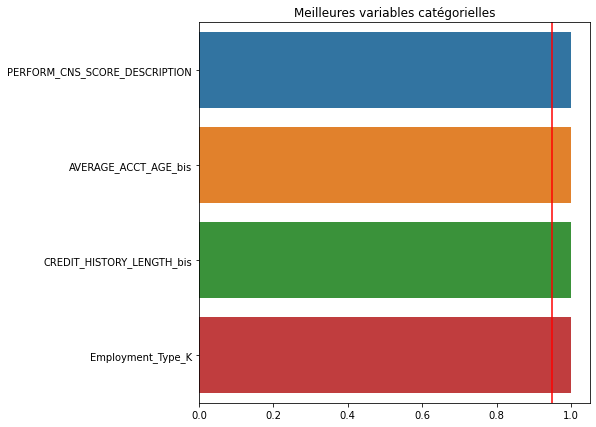

In [43]:
categorical=[ 'PERFORM_CNS_SCORE_DESCRIPTION','AVERAGE_ACCT_AGE_bis','CREDIT_HISTORY_LENGTH_bis','Employment_Type_K']
from scipy.stats import chi2_contingency
l=[]
for i in categorical:
    pvalue  = chi2_contingency(pd.crosstab(train['loan_default'],train[i]))[1]
    l.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=l, y=categorical)
plt.title('Meilleures variables catégorielles')
plt.axvline(x=(1-0.05),color='r')
plt.show()

Pour les variables catégorielles, nous utilisons le test du Chi 2, on remarque que les variables passent le test d'indépendance car elles dépassent le trait rouge. 

# Transformations des données avec boxcox

Nous allons utiliser la fonction boxcox(), cette dernière nous permet de compléter le traitement des outliers en transformant les données. En effet grâce à cette fonction nous nous rapprochons d'une loi normale afin que les valeurs de nos variables tendent vers la moyenne. 

In [44]:
from scipy.stats import boxcox

transformed = []
transformed_with_one = []
not_transformed = []

def column_to_transform(data):

    num_col = ['disbursed_amount', 'asset_cost', 'ltv',
            'NEW_ACCTS_IN_LAST_SIX_THS', 'CREDIT_HISTORY_LENGTH_bis',
            'DELINQUENT_ACCTS_IN_LAST_SIX_THS', 'AVERAGE_ACCT_AGE_bis',
            'NO_OF_ACCTS', 'ACTIVE_ACCTS', 'OVERDUE_ACCTS', 'CURRENT_BALANCE',
            'SANCTIONED_AMOUNT', 'DISBURSED_AMOUNT', 'INSTAL_AMT']
    
    num_col_data = data[num_col]
    
def transformation_boxcox(num_col_data):
    for i in num_col:
        if num_col_data[i].min() > 0:
            num_col_data[i] = boxcox(num_col_data[i])[0]
            transformed.append(i)
        elif num_col_data[i].min() == 0:
            num_col_data[i] = boxcox(num_col_data[i]+1)[0]
            transformed_with_one.append(i)
        else:
            num_col_data[i] = num_col_data[i]
            not_transformed.append(i)
    
    transformation_boxcox(data)

column_to_transform(train)

In [45]:
#On définit X et y 

X = train.drop(['loan_default'], axis=1)
y = train['loan_default']

In [46]:
X.head()

,disbursed_amount,asset_cost,ltv,Employment_Type_K,PERFORM_CNS_SCORE_DESCRIPTION,NEW_ACCTS_IN_LAST_SIX_THS,DELINQUENT_ACCTS_IN_LAST_SIX_THS,AVERAGE_ACCT_AGE_bis,CREDIT_HISTORY_LENGTH_bis,ACTIVE_ACCTS,NO_OF_ACCTS,OVERDUE_ACCTS,CURRENT_BALANCE,SANCTIONED_AMOUNT,DISBURSED_AMOUNT,INSTAL_AMT
0,47145,65550,73.23000,0,4,0,1,2,2,1,1,1,27600,50200,50200,1991
1,53278,61360,89.63000,0,1,0,0,0,0,0,0,0,0,0,0,0
2,57513,66113,88.48000,0,6,0,0,1,1,0,3,0,0,0,0,31
3,52378,60300,88.39000,0,1,0,0,0,0,0,0,0,0,0,0,0
4,54513,61900,89.66000,0,2,0,0,2,2,0,2,0,0,0,0,1347


# Prédiction avec SMOTE

SMOTE est librairie est spécialement conçu pour les jeux de données déséquilibrés, on l'utilise souvent dans la lutte contre la fraude par exemple.

In [47]:
smote = SMOTE()
X_tf,y_tf = smote.fit_resample(X,y)
X_tf.shape, y_tf.shape

((365084, 16), (365084,))

# Scaling et séparation du jeu de données en train,test

In [48]:
scaler = preprocessing.RobustScaler()
X_tf = scaler.fit_transform(X_tf)

# Split the data into training and testing sets 
x_train,x_test,y_train,y_test = train_test_split(X_tf,y_tf,test_size = 0.1, random_state = 3300)

print(x_train.shape[0], x_test.shape[0])

328575 36509


In [49]:
#print(x_train)

# Création de la fonction pour entraîner le modèle avec différents algorithmes

Nous allons utiliser une fonction nous permettant d'identifier le meilleur algorithme pour notre jeu de données, nous utiliserons les métrics spécifiques à chaque algo pour pouvoir les comparer. 

In [50]:
accuracy = {}
roc_r = {}

def train_model(model, model_name):
    print(model_name)
    
    # Fitting model
    model = model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    #Model accuracy
    acc = accuracy_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('accuracy_score',acc)
    print('precision_score',precision_score(y_test, pred)*100)
    print('recall_score',recall_score(y_test, pred)*100)
    print('f1_score',f1_score(y_test, pred)*100)
    
    
    #ROC Score
    roc_score = roc_auc_score(y_test, pred)*100
    roc_r[model_name] = roc_score
    print('roc_auc_score',roc_score)
    
    # Confusion matrix
    print('confusion_matrix')
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    
    #ROC Score
    fpr, tpr, threshold = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)*100
    
    #ROC Plot
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

K Nearest Neighbour
accuracy_score 72.4834972198636
precision_score 69.44069431051109
recall_score 79.52512424075097
f1_score 74.14157014157013
roc_auc_score 72.53879995938848
confusion_matrix
       0      1
0  12061   6338
1   3708  14402


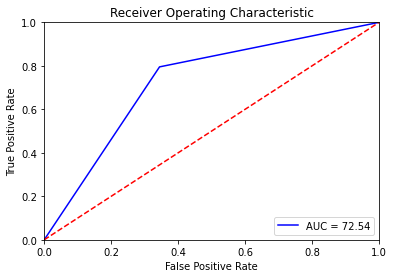

In [51]:
knn = KNeighborsClassifier(weights='distance', algorithm='auto', n_neighbors=3, n_jobs=5)

train_model(knn, 'K Nearest Neighbour')

Decision Tree Classifier
accuracy_score 63.825358130871834
precision_score 62.74764702823566
recall_score 66.6316951960243
f1_score 64.63137034359016
roc_auc_score 63.84739822576366
confusion_matrix
       0      1
0  11235   7164
1   6043  12067


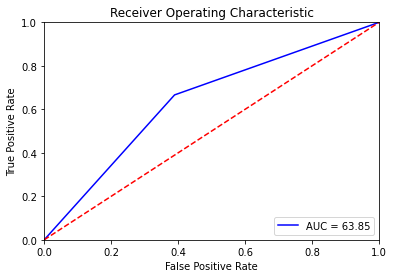

In [52]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=25, min_samples_split=4,
                            min_samples_leaf=2)

train_model(dtc, 'Decision Tree Classifier')

LGBMClassifier
accuracy_score 68.5611766961571
precision_score 67.7155679025537
recall_score 69.98895637769188
f1_score 68.83349625285109
roc_auc_score 68.57239003188089
confusion_matrix
       0      1
0  12356   6043
1   5435  12675


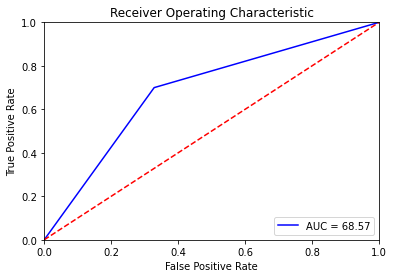

In [73]:
lgbm = LGBMClassifier(n_estimators=720, n_jobs=5, max_depth=20, min_child_weight=1, 
                      min_child_samples=1, num_leaves=20, learning_rate=0.15)

train_model(lgbm, 'LGBMClassifier')

Cat Boost
accuracy_score 68.09005998520912
precision_score 67.37306368330465
recall_score 69.16620651573716
f1_score 68.25786060705138
roc_auc_score 68.0985117039798
confusion_matrix
       0      1
0  12333   6066
1   5584  12526


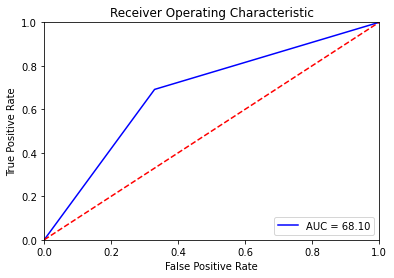

In [68]:
cat = CatBoostClassifier(verbose=0)

train_model(cat, "Cat Boost")

In [55]:
# Prédictions
y_head_knn = knn.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_lgbm = lgbm.predict(x_test)
y_head_cat = cat.predict(x_test)

In [56]:
#KNN
cm_knn = confusion_matrix(y_test,y_head_knn)
#arbre de déc.
cm_dtc = confusion_matrix(y_test,y_head_dtc)
#LGBM
cm_lgbm = confusion_matrix(y_test,y_head_lgbm)
#Cattree
cm_cat = confusion_matrix(y_test,y_head_cat)

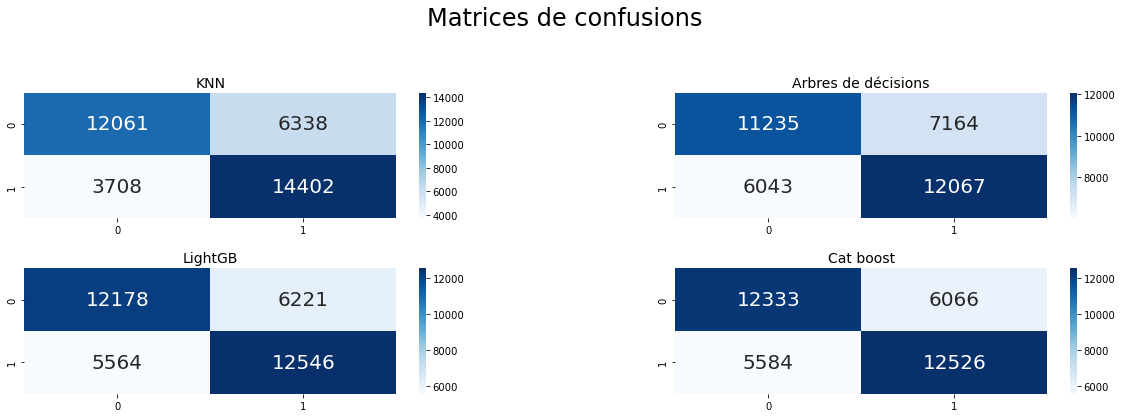

In [57]:
plt.figure(figsize=(20,12))

plt.suptitle("Matrices de confusions",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(4,2,1)
plt.title("KNN",fontsize= 14)
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d", annot_kws={"size": 20})

plt.subplot(4,2,2)
plt.title("Arbres de décisions",fontsize= 14)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d", annot_kws={"size": 20})

plt.subplot(4,2,3)
plt.title("LightGB",fontsize= 14)
sns.heatmap(cm_lgbm,annot=True,cmap="Blues",fmt="d", annot_kws={"size": 20})

plt.subplot(4,2,4)
plt.title("Cat boost",fontsize= 14)
sns.heatmap(cm_cat,annot=True,cmap="Blues",fmt="d", annot_kws={"size": 20})

plt.show()

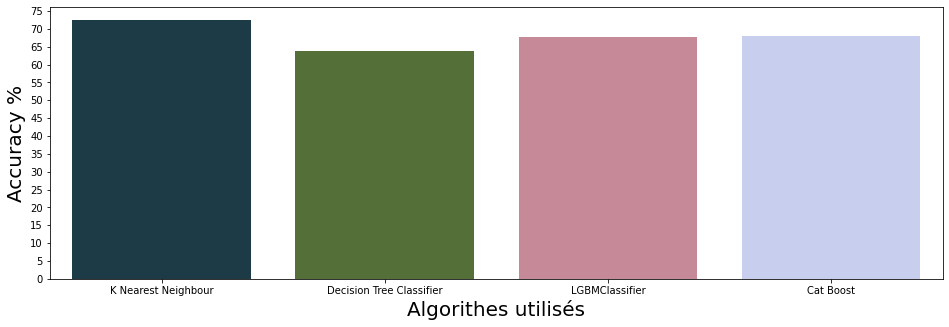

In [58]:
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,5))
plt.ylabel("Accuracy %",fontsize=20)
plt.xlabel("Algorithes utilisés", fontsize=20)
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette="cubehelix")

plt.show()

En regardant les graphiques, on voit que le meilleur modèle est obtenu à l'aide de l'algorithme KNN en terme de précision, malheureusement nous ne pouvons pas obtenir l'importance des variables car la fonction permettant de l'afficher n'est pas implanté avec les KNN. On peut également dire que nos prédictions sont satisfaisantes mais pas assez pour dire qu'elles sont excellentes, pour rappel un AUC compris entre :  
&nbsp; >0,70 et <=0,75 est satisfaisant  
&nbsp;                                                 >0,75 et 0,80 est bon  
&nbsp;                                                 >0,80 et 0,90 est très bon  
&nbsp;                                                 >0,90 est excellent mais très rare  

Note : un AUC proche de 0,5 revient au fait de tirer à pile ou face notre prédiction, s'en remettre au hasard n'est vraiment pas bon.
